### Preliminary LA Displacement Typology Exploration and Visualization

Please refer to the series of four notebooks I have included in this repository to get a sense of how I adjusted UDP's methodology to create the displacement typology CSV for Los Angeles shown here.

This analysis represents only very preliminary exploration of the typology data and Los Angeles County Census tracts in Python. My primary efforts so far have been focused on getting the typologies up and running with support from UDP staff, and creating the two maps in Carto which are linked in my analysis writeup.

Next, I intend to merge and further analyze these two datasets, then incorporate LEHD data on economic opportunities in the areas surrounding joint development projects into my analysis.

## 1. Los Angeles typologies: preliminary analysis

In [2]:
import pandas as pd

In [3]:
#Load LA displacement typology CSV
typologies = pd.read_csv('Los Angeles_typology_output.csv')

/srv/app/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (208,209) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Preliminary exploration:
len(typologies)

2339

In [5]:
typologies.describe()


,Unnamed: 0,GEOID_x,pop_17,white_17,hh_17,hinc_17,mhval_17,mhval_17_se,mrent_17,mrent_17_se,...,ARE,BE,SMMI,ARG,EOG,OD,OD_loss,SLI,double_counted,typology
count,2339.000000,2.339000e+03,2339.000000,2339.000000,2339.000000,2304.000000,2.339000e+03,2.339000e+03,2.339000e+03,2.339000e+03,...,2339.000000,2297.000000,2339.000000,2339.000000,2311.000000,2339.000000,2339.000000,2339.000000,2334.000000,2290.000000
mean,1169.000000,6.037407e+09,4316.819581,1142.437794,1407.486105,66196.767795,-2.512383e+07,-1.205516e+07,-1.253952e+07,-6.032779e+06,...,0.165455,0.037005,0.265926,0.006413,0.016876,0.023942,0.032920,0.287302,0.981148,5.145852
std,675.355462,2.270771e+05,1558.188377,1186.188319,605.692434,32499.201247,1.283649e+08,5.425568e+07,9.059204e+07,3.886850e+07,...,0.371670,0.188815,0.441919,0.079841,0.128834,0.152901,0.178466,0.452601,0.136030,3.005259
min,0.000000,6.037101e+09,0.000000,0.000000,0.000000,5682.000000,-6.666667e+08,-3.333333e+08,-6.666667e+08,-3.333333e+08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,584.500000,6.037211e+09,3250.000000,182.500000,1012.000000,41766.000000,3.520500e+05,2.391000e+04,1.130000e+03,7.800000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1169.000000,6.037405e+09,4213.000000,682.000000,1327.000000,59363.500000,4.431000e+05,3.788300e+04,1.321000e+03,1.190000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
75%,1753.500000,6.037552e+09,5306.500000,1824.000000,1733.000000,82116.000000,6.218000e+05,6.322050e+04,1.687000e+03,2.050000e+02,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,7.000000
max,2338.000000,6.037980e+09,12653.000000,6751.000000,5523.000000,250001.000000,2.000001e+06,7.425670e+05,3.501000e+03,2.560000e+03,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


### The neighborhood change typology designations are as follows:

Gentrification & Displacement:

    OD = Ongoing Displacement of Low-Income Households
    SLI = Not Currently at Risk of Gentrification
    ARG = At Risk of Gentrification
    EOG = Early/Ongoing Gentrification
    AdvG = Advanced Gentrification

Exclusion:

    SMMI = Stable Moderate/Mixed-Income
    ARE = At Risk of Exclusion
    BE = Becoming Exclusive
    SAE = Stable/Advanced Exclusive

    [] = Data Unavailable

In [6]:
typologies.head()
#typ_cat, the column all the way to the right, shows the typology designation for each tract.



,Unnamed: 0,GEOID_x,pop_17,white_17,hh_17,hinc_17,mhval_17,mhval_17_se,mrent_17,mrent_17_se,...,BE,SMMI,ARG,EOG,OD,OD_loss,SLI,double_counted,typology,typ_cat
0,0,6037101210,6043,2488,2330,34627.0,360600,51082,1174,61,...,0.0,0,0,0.0,0,0,1,1.0,1.0,['SLI']
1,1,6037102103,1838,1347,689,81477.0,538800,49634,2160,159,...,0.0,0,0,0.0,0,0,0,1.0,9.0,['SAE']
2,2,6037104105,5887,429,1611,39693.0,288400,47330,731,66,...,0.0,0,0,0.0,0,0,1,1.0,1.0,['SLI']
3,3,6037104404,3046,33,624,54242.0,349300,20213,1399,115,...,0.0,1,0,0.0,0,0,0,1.0,6.0,['SMMI']
4,4,6037104810,5806,249,1028,68250.0,345800,17784,1510,233,...,1.0,0,0,0.0,0,0,0,1.0,8.0,['BE']


In [7]:
#grouping by typ_cat typology categories:
typologies.groupby('typ_cat').describe()

ARE                                       ARG          ...       \
          count mean  std  min  25%  50%  75%  max  count mean     ...        
typ_cat                                                            ...        
['ARE']   387.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  387.0  0.0     ...        
['ARG']    15.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   15.0  1.0     ...        
['AdvG']   12.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   12.0  0.0     ...        
['BE']     85.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   85.0  0.0     ...        
['EOG']    39.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   39.0  0.0     ...        
['OD']     56.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   56.0  0.0     ...        
['SAE']   402.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  402.0  0.0     ...        
['SLI']   672.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  672.0  0.0     ...        
['SMMI']  622.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  622.0  0.0     ...        
[]         49.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   49.0  0.0     ...        

         white_17         white_90                                        \
              75%     max    count         mean          std         min   
typ_cat                                                                    
['ARE']   1795.50  5557.0    387.0  1985.472254  1328.823887    4.192682   
['ARG']    692.50  1551.0     15.0   847.576273  1103.035955   44.000000   
['AdvG']   675.00  1451.0     12.0  1116.002707   848.519392  147.922625   
['BE']    1596.00  4277.0     85.0  1449.720928  1170.367409   32.794683   
['EOG']    461.00  2018.0     39.0   556.897323   639.802056   21.180763   
['OD']     660.50  2984.0     56.0   782.932879   830.062486   30.211556   
['SAE']   3186.25  6751.0    402.0  2785.517501  1363.947758   61.457639   
['SLI']    440.50  4873.0    672.0   621.143200   811.423037    0.000000   
['SMMI']  1894.00  5401.0    622.0  1692.922365  1128.554583   34.305394   
[]         589.00  2576.0     46.0  1127.815748  1986.790866    0.000000   

                                                              
                  25%          50%          75%          max  
typ_cat                                                       
['ARE']    754.766829  1909.000006  2945.652855  6653.999993  
['ARG']    135.284481   351.050701  1142.630625  3689.079538  
['AdvG']   480.974591   967.853911  1644.397931  2559.624849  
['BE']     574.559361  1232.228618  1969.290831  5057.011806  
['EOG']    125.813572   313.045355   660.251317  2678.679421  
['OD']     148.481561   488.736717  1362.393432  3709.999981  
['SAE']   1890.555807  2646.957604  3640.282065  8417.868484  
['SLI']     76.835236   318.883380   826.188571  7433.583967  
['SMMI']   752.655901  1525.677356  2387.301698  5683.966261  
[]          38.537097   268.266623  1051.688925  9557.029122  

[10 rows x 2208 columns]

In [25]:
#removing the [] (data unavailable) typologies before visualizing

todrop = typologies[typologies['typ_cat'] == '[]'].index
typologies = typologies.drop(todrop)

typologies.groupby('typ_cat').describe()

ARE                                       ARG          ...       \
          count mean  std  min  25%  50%  75%  max  count mean     ...        
typ_cat                                                            ...        
['ARE']   387.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  387.0  0.0     ...        
['ARG']    15.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   15.0  1.0     ...        
['AdvG']   12.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   12.0  0.0     ...        
['BE']     85.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   85.0  0.0     ...        
['EOG']    39.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   39.0  0.0     ...        
['OD']     56.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   56.0  0.0     ...        
['SAE']   402.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  402.0  0.0     ...        
['SLI']   672.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  672.0  0.0     ...        
['SMMI']  622.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  622.0  0.0     ...        

         white_17         white_90                                        \
              75%     max    count         mean          std         min   
typ_cat                                                                    
['ARE']   1795.50  5557.0    387.0  1985.472254  1328.823887    4.192682   
['ARG']    692.50  1551.0     15.0   847.576273  1103.035955   44.000000   
['AdvG']   675.00  1451.0     12.0  1116.002707   848.519392  147.922625   
['BE']    1596.00  4277.0     85.0  1449.720928  1170.367409   32.794683   
['EOG']    461.00  2018.0     39.0   556.897323   639.802056   21.180763   
['OD']     660.50  2984.0     56.0   782.932879   830.062486   30.211556   
['SAE']   3186.25  6751.0    402.0  2785.517501  1363.947758   61.457639   
['SLI']    440.50  4873.0    672.0   621.143200   811.423037    0.000000   
['SMMI']  1894.00  5401.0    622.0  1692.922365  1128.554583   34.305394   

                                                              
                  25%          50%          75%          max  
typ_cat                                                       
['ARE']    754.766829  1909.000006  2945.652855  6653.999993  
['ARG']    135.284481   351.050701  1142.630625  3689.079538  
['AdvG']   480.974591   967.853911  1644.397931  2559.624849  
['BE']     574.559361  1232.228618  1969.290831  5057.011806  
['EOG']    125.813572   313.045355   660.251317  2678.679421  
['OD']     148.481561   488.736717  1362.393432  3709.999981  
['SAE']   1890.555807  2646.957604  3640.282065  8417.868484  
['SLI']     76.835236   318.883380   826.188571  7433.583967  
['SMMI']   752.655901  1525.677356  2387.301698  5683.966261  

[9 rows x 2208 columns]

Text(0.5, 0, '')

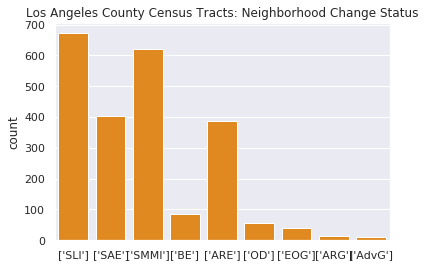

In [27]:
#Chart showing the relative amounts of all typologies across the county:

import seaborn as sns
sns.set() 

ax = sns.countplot(data = typologies, x = 'typ_cat', color = 'darkorange')
ax.set_title("Los Angeles County Census Tracts: Neighborhood Change Status")
ax.set_xlabel('')

### Preliminary Findings

This plot demonstrates that many tracts are "stable," or not currently at risk of gentrification, 
displacement, and/or exlcusion (represented as Not Currently at Risk of Gentrification & Stable Moderate-Mixed-Income).

Besides those categories, Stable/Advanced Exlcusion and At Risk of Exclusion are most common.

## 2. Load Los Angeles County Census Tracts from TIGER/LINE

In [30]:
#Load Los Angeles County Census Tracts

import requests
import geopandas as gpd

#Starting with all California Census Tracts
url = 'https://www2.census.gov/geo/tiger/TIGER2010/TRACT/2010/tl_2010_06_tract10.zip'

with open('tl_2010_06_tract10.zip', 'wb') as f:
    r = requests.get(url)
    f.write(r.content)

tracts = gpd.read_file('zip://tl_2010_06_tract10.zip')

#Filter to only include Los Angeles County tracts

los_angeles_tracts = tracts.loc[tracts.COUNTYFP10 == '037']

In [31]:
#preliminary exploration:
len(los_angeles_tracts)

2346

In [32]:
los_angeles_tracts.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
5711,06,037,920336,06037920336,9203.36,Census Tract 9203.36,G5020,S,1656848,967,+34.3855971,-118.5358844,"POLYGON ((-118.524107 34.375515, -118.524534 3..."
5712,06,037,920044,06037920044,9200.44,Census Tract 9200.44,G5020,S,972475,27696,+34.4435485,-118.5164043,"POLYGON ((-118.52158 34.442116, -118.521999 34..."
5713,06,037,573003,06037573003,5730.03,Census Tract 5730.03,G5020,S,401153,46959,+33.7943972,-118.2020691,"POLYGON ((-118.201433 33.789846, -118.201732 3..."
5714,06,037,571704,06037571704,5717.04,Census Tract 5717.04,G5020,S,481586,0,+33.8499458,-118.1870723,"POLYGON ((-118.187321 33.845621, -118.187714 3..."
5715,06,037,570403,06037570403,5704.03,Census Tract 5704.03,G5020,S,570677,0,+33.8778668,-118.2044859,"POLYGON ((-118.208134 33.874626, -118.208134 3..."


In [33]:
los_angeles_tracts.describe()

,ALAND10,AWATER10
count,2.346000e+03,2.346000e+03
mean,4.479910e+06,7.651376e+05
std,3.396120e+07,2.355566e+07
min,0.000000e+00,0.000000e+00
25%,5.931080e+05,0.000000e+00
50%,1.013994e+06,0.000000e+00
75%,1.818865e+06,2.769000e+03
max,1.028877e+09,1.098453e+09
